Blog site: https://medium.com/@siyao_sui/convolutional-neural-networks-with-fashion-mnist-dataset-8dc95433cbd0

In [69]:
from mnist_reader import load_mnist
from keras.layers import Dense, MaxPooling2D, Conv2D, Dropout
from keras.layers import Flatten, InputLayer, Lambda
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras import optimizers
from keras.utils import np_utils
from keras.initializers import Constant
import keras
from keras import models, layers
import numpy as np

In [40]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

In [ ]:
y_test.shape

In [41]:
X_train = (X_train.reshape([-1, 28, 28, 1])) / 255
X_test = (X_test.reshape([-1, 28, 28, 1])) / 255

y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [32]:
input_shape = (28, 28, 1)

### CNN with 1 layer

In [43]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))

In [44]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
result_1 = model_1.fit(X_train, y_train, 
            epochs=10, 
            batch_size=64, 
            verbose = 1, validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 460us/step - loss: 0.4441 - acc: 0.8411 - val_loss: 0.3500 - val_acc: 0.8716
Epoch 2/10
60000/60000 [==============================] - 28s 461us/step - loss: 0.3172 - acc: 0.8843 - val_loss: 0.3207 - val_acc: 0.8818
Epoch 3/10
60000/60000 [==============================] - 28s 473us/step - loss: 0.2818 - acc: 0.8973 - val_loss: 0.2680 - val_acc: 0.9025
Epoch 4/10
60000/60000 [==============================] - 28s 465us/step - loss: 0.2545 - acc: 0.9051 - val_loss: 0.2595 - val_acc: 0.9031
Epoch 5/10
60000/60000 [==============================] - 28s 464us/step - loss: 0.2367 - acc: 0.9119 - val_loss: 0.2504 - val_acc: 0.9082
Epoch 6/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.2195 - acc: 0.9180 - val_loss: 0.2477 - val_acc: 0.9080
Epoch 7/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.2064 - acc: 0.9220 - val_loss: 0.

In [51]:
score_1 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.242430664873
Test accuracy: 0.9136


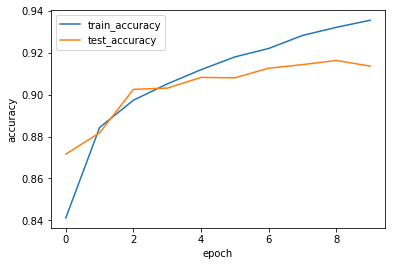

In [49]:
import matplotlib.pyplot as plt
def show_history(result_1):
    plt.plot(result_1.history['acc'])
    plt.plot(result_1.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(result_1)

### CNN with 2 layers

In [52]:
model_2 = models.Sequential()

model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.5))

model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.5))


model_2.add(layers.Flatten())
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_2.summary()

In [53]:
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
result_2 = model_2.fit(X_train, y_train, 
            epochs=10, 
            batch_size=64, 
            verbose = 1, validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 885us/step - loss: 0.7318 - acc: 0.7291 - val_loss: 0.4704 - val_acc: 0.8270
Epoch 2/10
60000/60000 [==============================] - 51s 849us/step - loss: 0.5077 - acc: 0.8140 - val_loss: 0.3929 - val_acc: 0.8584
Epoch 3/10
60000/60000 [==============================] - 52s 868us/step - loss: 0.4491 - acc: 0.8353 - val_loss: 0.3777 - val_acc: 0.8668
Epoch 4/10
60000/60000 [==============================] - 53s 880us/step - loss: 0.4153 - acc: 0.8482 - val_loss: 0.3255 - val_acc: 0.8836
Epoch 5/10
60000/60000 [==============================] - 51s 853us/step - loss: 0.3924 - acc: 0.8572 - val_loss: 0.3190 - val_acc: 0.8865
Epoch 6/10
60000/60000 [==============================] - 52s 865us/step - loss: 0.3777 - acc: 0.8620 - val_loss: 0.3071 - val_acc: 0.8882
Epoch 7/10
60000/60000 [==============================] - 54s 897us/step - loss: 0.3664 - acc: 0.8657 - val_loss: 0.

In [58]:
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.280061510968
Test accuracy: 0.8968


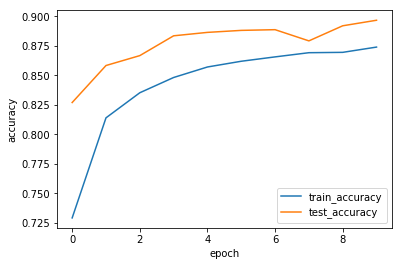

In [59]:
import matplotlib.pyplot as plt
def show_history(result_2):
    plt.plot(result_2.history['acc'])
    plt.plot(result_2.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(result_2)

### CNN with 4 layers and Batch Normalization

In [72]:
def normalize(data):
    return (data - X_train.mean().astype(np.float32)) / (X_train.std().astype(np.float32))

In [73]:
model_4 = Sequential([
    Lambda(normalize, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),


    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [75]:
model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
result_4 = model_4.fit(X_train, y_train, 
            epochs=10, 
            batch_size=64, 
            verbose = 1, validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 481s 8ms/step - loss: 0.5467 - acc: 0.8080 - val_loss: 0.3330 - val_acc: 0.8802
Epoch 2/10
60000/60000 [==============================] - 481s 8ms/step - loss: 0.3419 - acc: 0.8789 - val_loss: 0.2842 - val_acc: 0.8980
Epoch 3/10
60000/60000 [==============================] - 478s 8ms/step - loss: 0.2916 - acc: 0.8969 - val_loss: 0.2668 - val_acc: 0.9035
Epoch 4/10
60000/60000 [==============================] - 469s 8ms/step - loss: 0.2667 - acc: 0.9055 - val_loss: 0.2539 - val_acc: 0.9076
Epoch 5/10
60000/60000 [==============================] - 480s 8ms/step - loss: 0.2437 - acc: 0.9129 - val_loss: 0.2264 - val_acc: 0.9183
Epoch 6/10
60000/60000 [==============================] - 474s 8ms/step - loss: 0.2301 - acc: 0.9177 - val_loss: 0.2258 - val_acc: 0.9191
Epoch 7/10
60000/60000 [==============================] - 548s 9ms/step - loss: 0.2147 - acc: 0.9227 - val_loss: 0.2702 - 

In [76]:
score_4 = model_4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_4[0])
print('Test accuracy:', score_4[1])

Test loss: 0.200547082913
Test accuracy: 0.9298


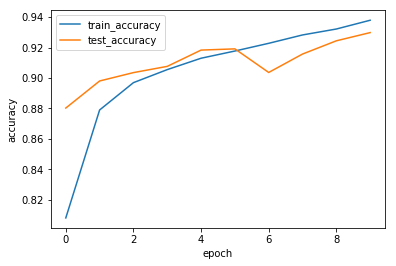

In [77]:
def show_history(result_4):
    plt.plot(result_4.history['acc'])
    plt.plot(result_4.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(result_4)